### About Dataset
The dataset comprises information on 1000 customers, with 84 features derived from their financial transactions and current financial standing. The primary objective is to leverage this dataset for credit risk estimation and predicting potential defaults.

- CUST_ID: Unique customer identifier
Key Target Variables:

- CREDIT_SCORE: Numerical target variable representing the customer's credit score (integer)
- DEFAULT: Binary target variable indicating if the customer has defaulted (1) or not (0)
Description of Features:

- INCOME: Total income in the last 12 months
- SAVINGS: Total savings in the last 12 months
- DEBT: Total existing debt
- R_SAVINGS_INCOME: Ratio of savings to income
- R_DEBT_INCOME: Ratio of debt to income
- R_DEBT_SAVINGS: Ratio of debt to savings

### Transaction groups (GROCERIES, CLOTHING, HOUSING, EDUCATION, HEALTH, TRAVEL, ENTERTAINMENT, GAMBLING, UTILITIES, TAX, FINES) are categorized.

- T_{GROUP}_6: Total expenditure in that group in the last 6 months
- T_GROUP_12: Total expenditure in that group in the last 12 months
- R_[GROUP]: Ratio of T_[GROUP]6 to T[GROUP]_12
- R_[GROUP]INCOME: Ratio of T[GROUP]_12 to INCOME
- R_[GROUP]SAVINGS: Ratio of T[GROUP]_12 to SAVINGS
- R_[GROUP]DEBT: Ratio of T[GROUP]_12 to DEBT
### Categorical Features:

- CAT_GAMBLING: Gambling category (none, low, high)
- CAT_DEBT: 1 if the customer has debt; 0 otherwise
- CAT_CREDIT_CARD: 1 if the customer has a credit card; 0 otherwise
- CAT_MORTGAGE: 1 if the customer has a mortgage; 0 otherwise
- CAT_SAVINGS_ACCOUNT: 1 if the customer has a savings account; 0 otherwise
- CAT_DEPENDENTS: 1 if the customer has any dependents; 0 otherwise
### See XAI course based on this dataset: https://adataodyssey.com/courses/xai-with-python/

### Our first steps
- Split whole dataset into two parts: for modellers and for validators (70% and 30%)
- Split the first part into two parts: for training and for validation (70% and 30%)
- Split validation part from the first part into two parts: for validation and for testing (66% and 34%)
- Save all parts into separate files
- Remember to set the random seed for reproducibility

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
np.random.seed = 42

df=pd.read_csv('../../data/credit_score.csv')
# take without first column and last
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

We will remove ID column, because it is not useful for our model.

In [53]:
X

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1.0000,0.0000,0.0625,High,1,0,0,0,0,444
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,No,1,0,0,1,0,625
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,High,1,0,0,1,0,469
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.0000,1.2500,0.1282,High,1,0,0,1,0,559
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,High,1,1,1,1,1,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,328892,1465066,5501471,4.4546,16.7273,3.7551,16701,10132,0.6067,0.0508,...,0.9091,0.2041,0.0543,High,1,1,1,1,1,418
996,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,0.0663,...,0.9091,0.8333,0.1087,No,1,0,0,1,0,589
997,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,0.0047,...,1.0668,0.2500,0.3448,No,1,0,0,1,0,499
998,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,0.0553,...,1.1111,5.0002,0.0662,No,1,1,0,1,0,507


In [54]:
y

0      1
1      0
2      1
3      0
4      0
      ..
995    0
996    1
997    0
998    0
999    0
Name: DEFAULT, Length: 1000, dtype: int64

In [55]:
# Split whole dataset into two parts: for modellers and for validators (70% and 30%)
X_mod, X_val, y_mod, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_mod.shape, X_val.shape, y_mod.shape, y_val.shape)

(700, 85) (300, 85) (700,) (300,)


In [56]:
df_validators=pd.concat([X_val, y_val], axis=1)
df_validators.to_csv('../../data/for_validators/credit_score_validators.csv', index=False)

In [57]:
X_train,X_valid,y_train,y_valid = train_test_split(X_mod, y_mod, test_size=0.3, random_state=42, stratify=y_mod)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(490, 85) (210, 85) (490,) (210,)


In [58]:
df_modellers=pd.concat([X_train, y_train], axis=1)
#df_modellers
df_modellers.to_csv('../../data/for_modelling/credit_score_train.csv', index=False)

In [59]:
# Split validation part from the first part into two parts: for validation and for testing (66% and 34%)
X_validation,X_test,y_validation,y_test = train_test_split(X_valid, y_valid, test_size=0.34, random_state=42, stratify=y_valid)
print(X_validation.shape, X_test.shape, y_validation.shape, y_test.shape)

(138, 85) (72, 85) (138,) (72,)


In [60]:
df_valid=pd.concat([X_validation, y_validation], axis=1)
df_valid.to_csv('../../data/for_modelling/credit_score_valid.csv', index=False)

In [61]:
df_test=pd.concat([X_test, y_test], axis=1)
df_test.to_csv('../../data/for_modelling/credit_score_test.csv', index=False)

### YEY! We have prepared the data for modellers and validators

Let's move to EDA

In [62]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('../../data/for_modelling/credit_score_train.csv')
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,2783,1855,0,0.6665,0.0000,0.0000,103,74,0.7184,0.0370,...,2.5003,0.0000,No,0,0,0,1,0,570,0
1,314430,445442,707468,1.4167,2.2500,1.5882,35861,29157,0.8131,0.1141,...,0.5882,0.3704,High,1,0,1,1,0,691,0
2,161773,517674,2782496,3.2000,17.2000,5.3750,3716,2533,0.6816,0.0230,...,0.3125,0.0581,No,1,1,1,1,1,520,0
3,16014,97685,20818,6.1000,1.3000,0.2131,637,187,0.2936,0.0398,...,0.1639,0.7692,No,1,0,0,1,0,654,0
4,193225,1410542,2589215,7.3000,13.4000,1.8356,5276,2325,0.4407,0.0273,...,0.1370,0.0746,No,1,1,0,1,1,552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,20007,22508,457665,1.1250,22.8752,20.3334,1451,861,0.5934,0.0725,...,1.1111,0.0546,No,1,0,0,1,0,423,0
486,20846,268679,23162,12.8888,1.1111,0.0862,1302,533,0.4094,0.0625,...,0.0862,1.0000,Low,1,0,0,1,0,584,0
487,89235,1106514,160623,12.4000,1.8000,0.1452,2413,835,0.3460,0.0270,...,0.0806,0.5556,No,1,0,0,1,0,631,0
488,197073,1021195,1863233,5.1818,9.4545,1.8246,8416,3948,0.4691,0.0427,...,0.1754,0.0962,High,1,0,1,1,1,572,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCOME                   490 non-null    int64  
 1   SAVINGS                  490 non-null    int64  
 2   DEBT                     490 non-null    int64  
 3   R_SAVINGS_INCOME         490 non-null    float64
 4   R_DEBT_INCOME            490 non-null    float64
 5   R_DEBT_SAVINGS           490 non-null    float64
 6   T_CLOTHING_12            490 non-null    int64  
 7   T_CLOTHING_6             490 non-null    int64  
 8   R_CLOTHING               490 non-null    float64
 9   R_CLOTHING_INCOME        490 non-null    float64
 10  R_CLOTHING_SAVINGS       490 non-null    float64
 11  R_CLOTHING_DEBT          490 non-null    float64
 12  T_EDUCATION_12           490 non-null    int64  
 13  T_EDUCATION_6            490 non-null    int64  
 14  R_EDUCATION              4

In [64]:
#how many categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns
print(f'categorical columns: {cat_cols}')
print(f'numerical columns: {num_cols}')
print(f'number of categorical columns: {len(cat_cols)}')
print(f'number of numerical columns: {len(num_cols)}')


categorical columns: Index(['CAT_GAMBLING'], dtype='object')
numerical columns: Index(['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
       'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING',
       'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT',
       'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME',
       'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12',
       'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME',
       'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12',
       'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING',
       'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT',
       'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME',
       'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6',
       'R_HEALTH', 'R_HEALTH_INCOME', 'R_HEAL

In [65]:
#check CAT_GAMBLING values
df['CAT_GAMBLING'].value_counts()

CAT_GAMBLING
No      315
High    118
Low      57
Name: count, dtype: int64

### Small Summary
- No missing values :)
- 1 categorical column
- 85 numerical columns

In [66]:
df.describe()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
count,490.000000,4.900000e+02,4.900000e+02,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,...,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,120719.508163,4.177769e+05,8.130468e+05,4.243392,6.063549,5.769863,6814.891837,3409.665306,0.459157,0.055068,...,0.939776,0.907799,0.589252,0.944898,0.244898,0.185714,0.995918,0.175510,587.375510,0.283673
std,108530.163289,4.278823e+05,9.970338e+05,4.034971,5.942546,14.544667,7509.407152,5114.437363,0.232878,0.035343,...,0.163942,1.640133,1.244183,0.228413,0.430466,0.389273,0.063822,0.380792,63.262218,0.451241
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.003300,0.005000,...,0.666700,0.067600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000
25%,31966.500000,7.158300e+04,5.305200e+04,1.100000,1.475025,0.203350,1210.750000,355.500000,0.271600,0.029925,...,0.833300,0.151500,0.098000,1.000000,0.000000,0.000000,1.000000,0.000000,556.000000,0.000000
50%,86994.000000,2.963925e+05,3.950955e+05,2.785700,4.732150,1.926800,4340.500000,1357.500000,0.472100,0.046550,...,0.909100,0.298550,0.181800,1.000000,0.000000,0.000000,1.000000,0.000000,593.500000,0.000000
75%,178664.000000,6.220012e+05,1.273301e+06,6.808100,8.627300,4.776525,9960.000000,4471.500000,0.621650,0.068475,...,1.000000,0.890150,0.588200,1.000000,0.000000,0.000000,1.000000,0.000000,630.000000,1.000000
max,545667.000000,2.479635e+06,5.968620e+06,16.111200,37.000600,166.978800,43255.000000,39918.000000,1.058300,0.241300,...,2.000000,10.009900,10.005300,1.000000,1.000000,1.000000,1.000000,1.000000,800.000000,1.000000


In [67]:
target='DEFAULT'
df[target].value_counts()

DEFAULT
0    351
1    139
Name: count, dtype: int64

### We are looking for the best model to predict the target variable (DEFAULT)

In [68]:
# encoding categorical variable CAT_GAMBLING to numerical
df['CAT_GAMBLING'] = df['CAT_GAMBLING'].map({'No': 0, 'Low': 1,'High': 2})
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,2783,1855,0,0.6665,0.0000,0.0000,103,74,0.7184,0.0370,...,2.5003,0.0000,0,0,0,0,1,0,570,0
1,314430,445442,707468,1.4167,2.2500,1.5882,35861,29157,0.8131,0.1141,...,0.5882,0.3704,2,1,0,1,1,0,691,0
2,161773,517674,2782496,3.2000,17.2000,5.3750,3716,2533,0.6816,0.0230,...,0.3125,0.0581,0,1,1,1,1,1,520,0
3,16014,97685,20818,6.1000,1.3000,0.2131,637,187,0.2936,0.0398,...,0.1639,0.7692,0,1,0,0,1,0,654,0
4,193225,1410542,2589215,7.3000,13.4000,1.8356,5276,2325,0.4407,0.0273,...,0.1370,0.0746,0,1,1,0,1,1,552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,20007,22508,457665,1.1250,22.8752,20.3334,1451,861,0.5934,0.0725,...,1.1111,0.0546,0,1,0,0,1,0,423,0
486,20846,268679,23162,12.8888,1.1111,0.0862,1302,533,0.4094,0.0625,...,0.0862,1.0000,1,1,0,0,1,0,584,0
487,89235,1106514,160623,12.4000,1.8000,0.1452,2413,835,0.3460,0.0270,...,0.0806,0.5556,0,1,0,0,1,0,631,0
488,197073,1021195,1863233,5.1818,9.4545,1.8246,8416,3948,0.4691,0.0427,...,0.1754,0.0962,2,1,0,1,1,1,572,0


We have encoded CAT_GAMBLING
- No: 0
- Low: 1
- High: 2

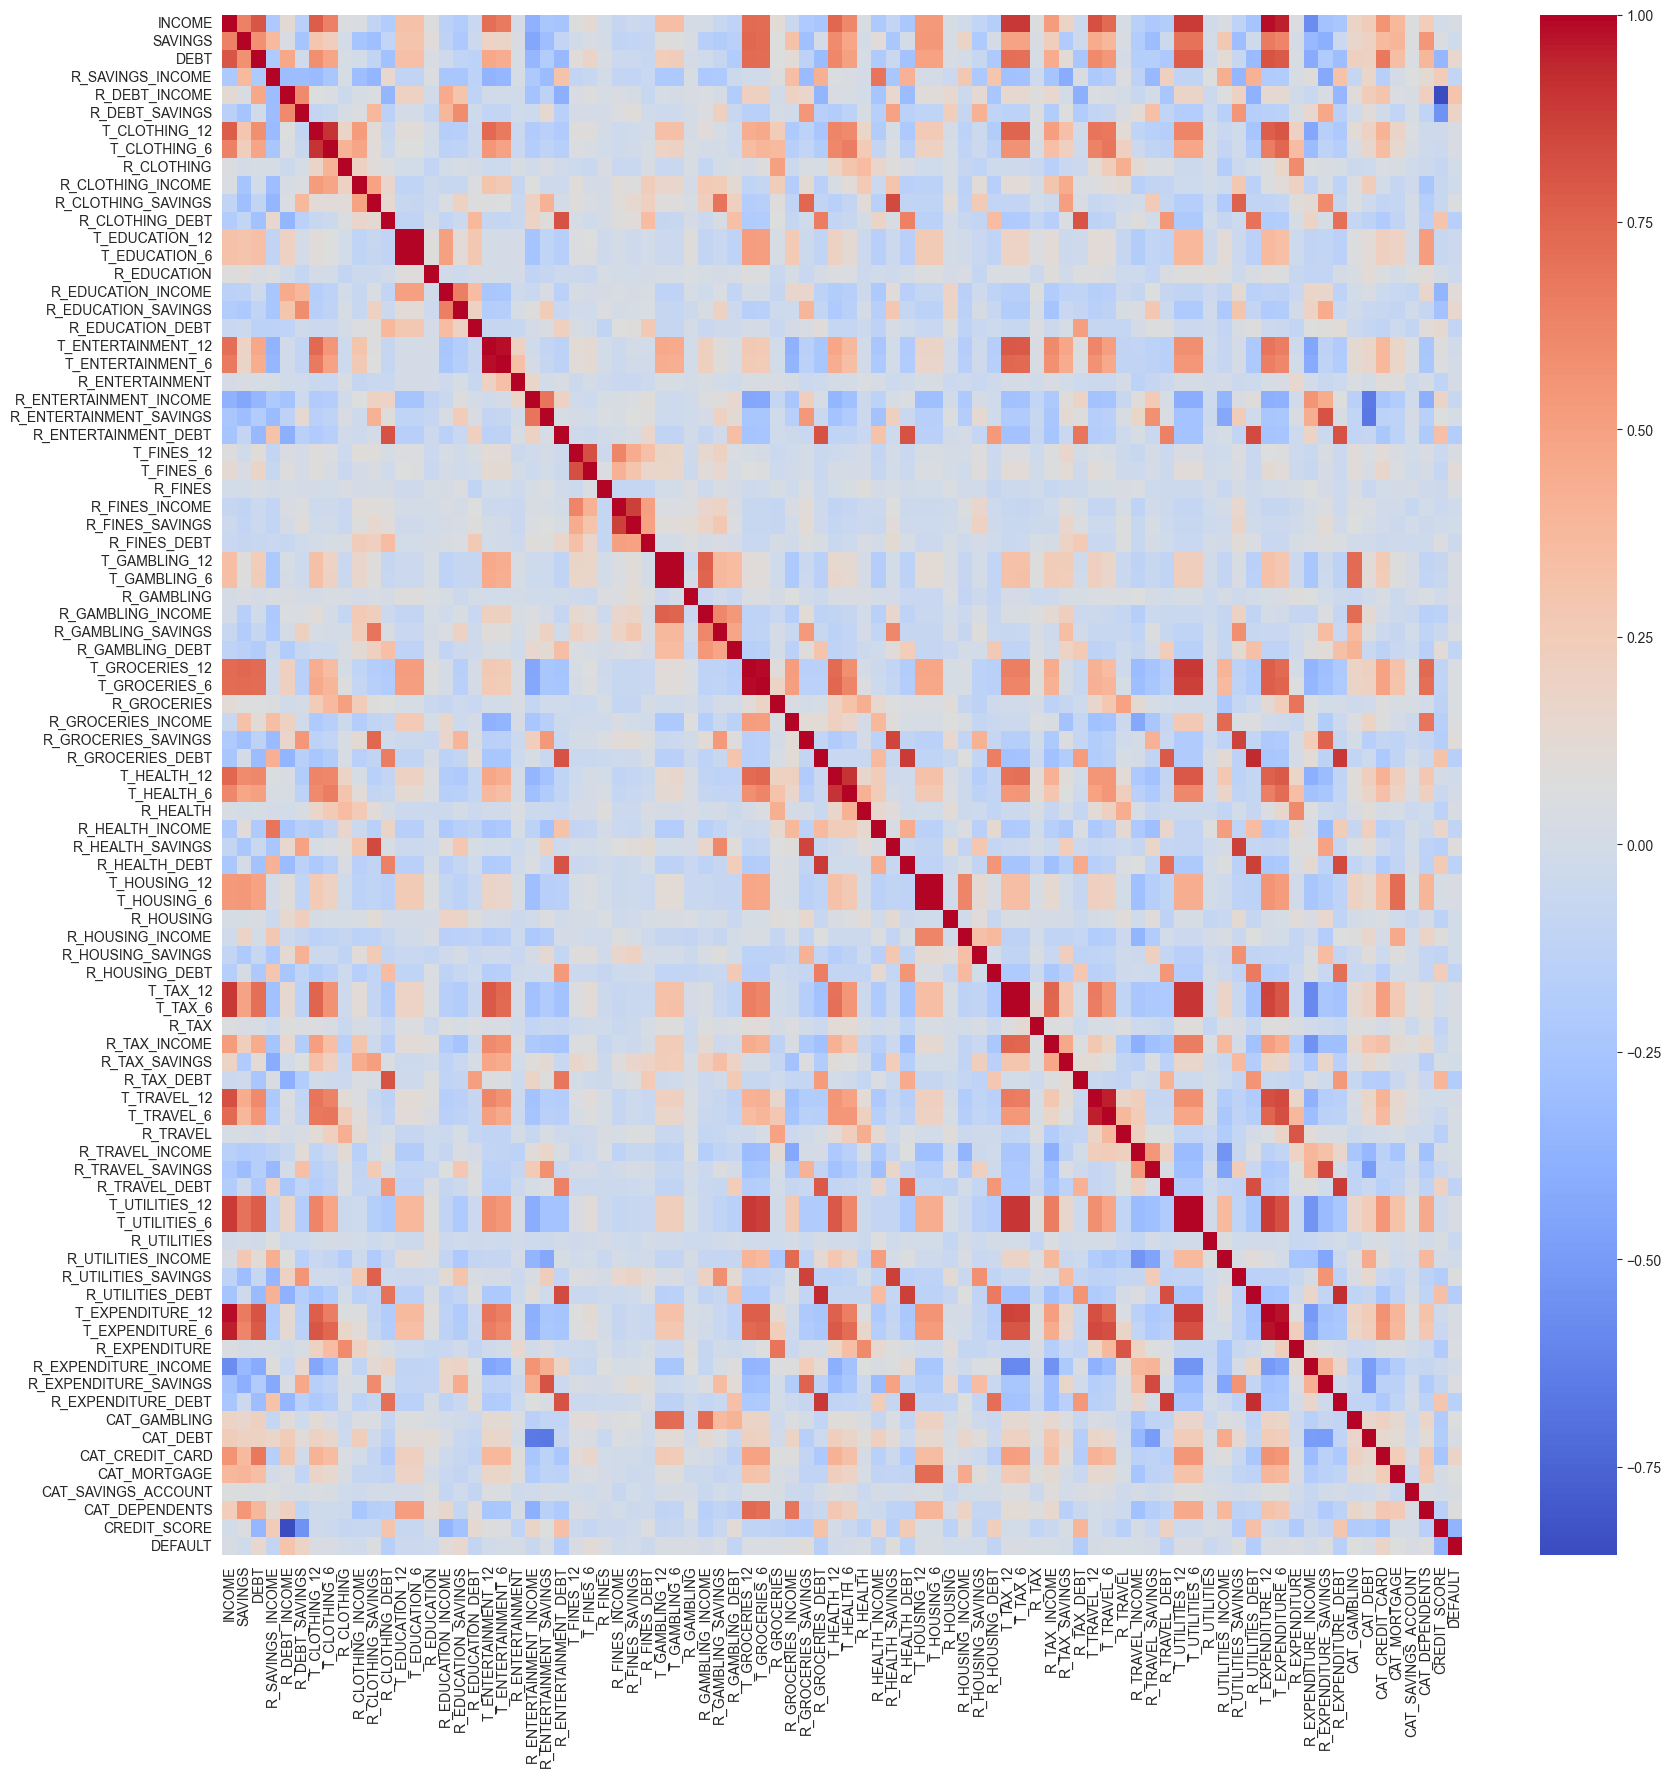

In [69]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

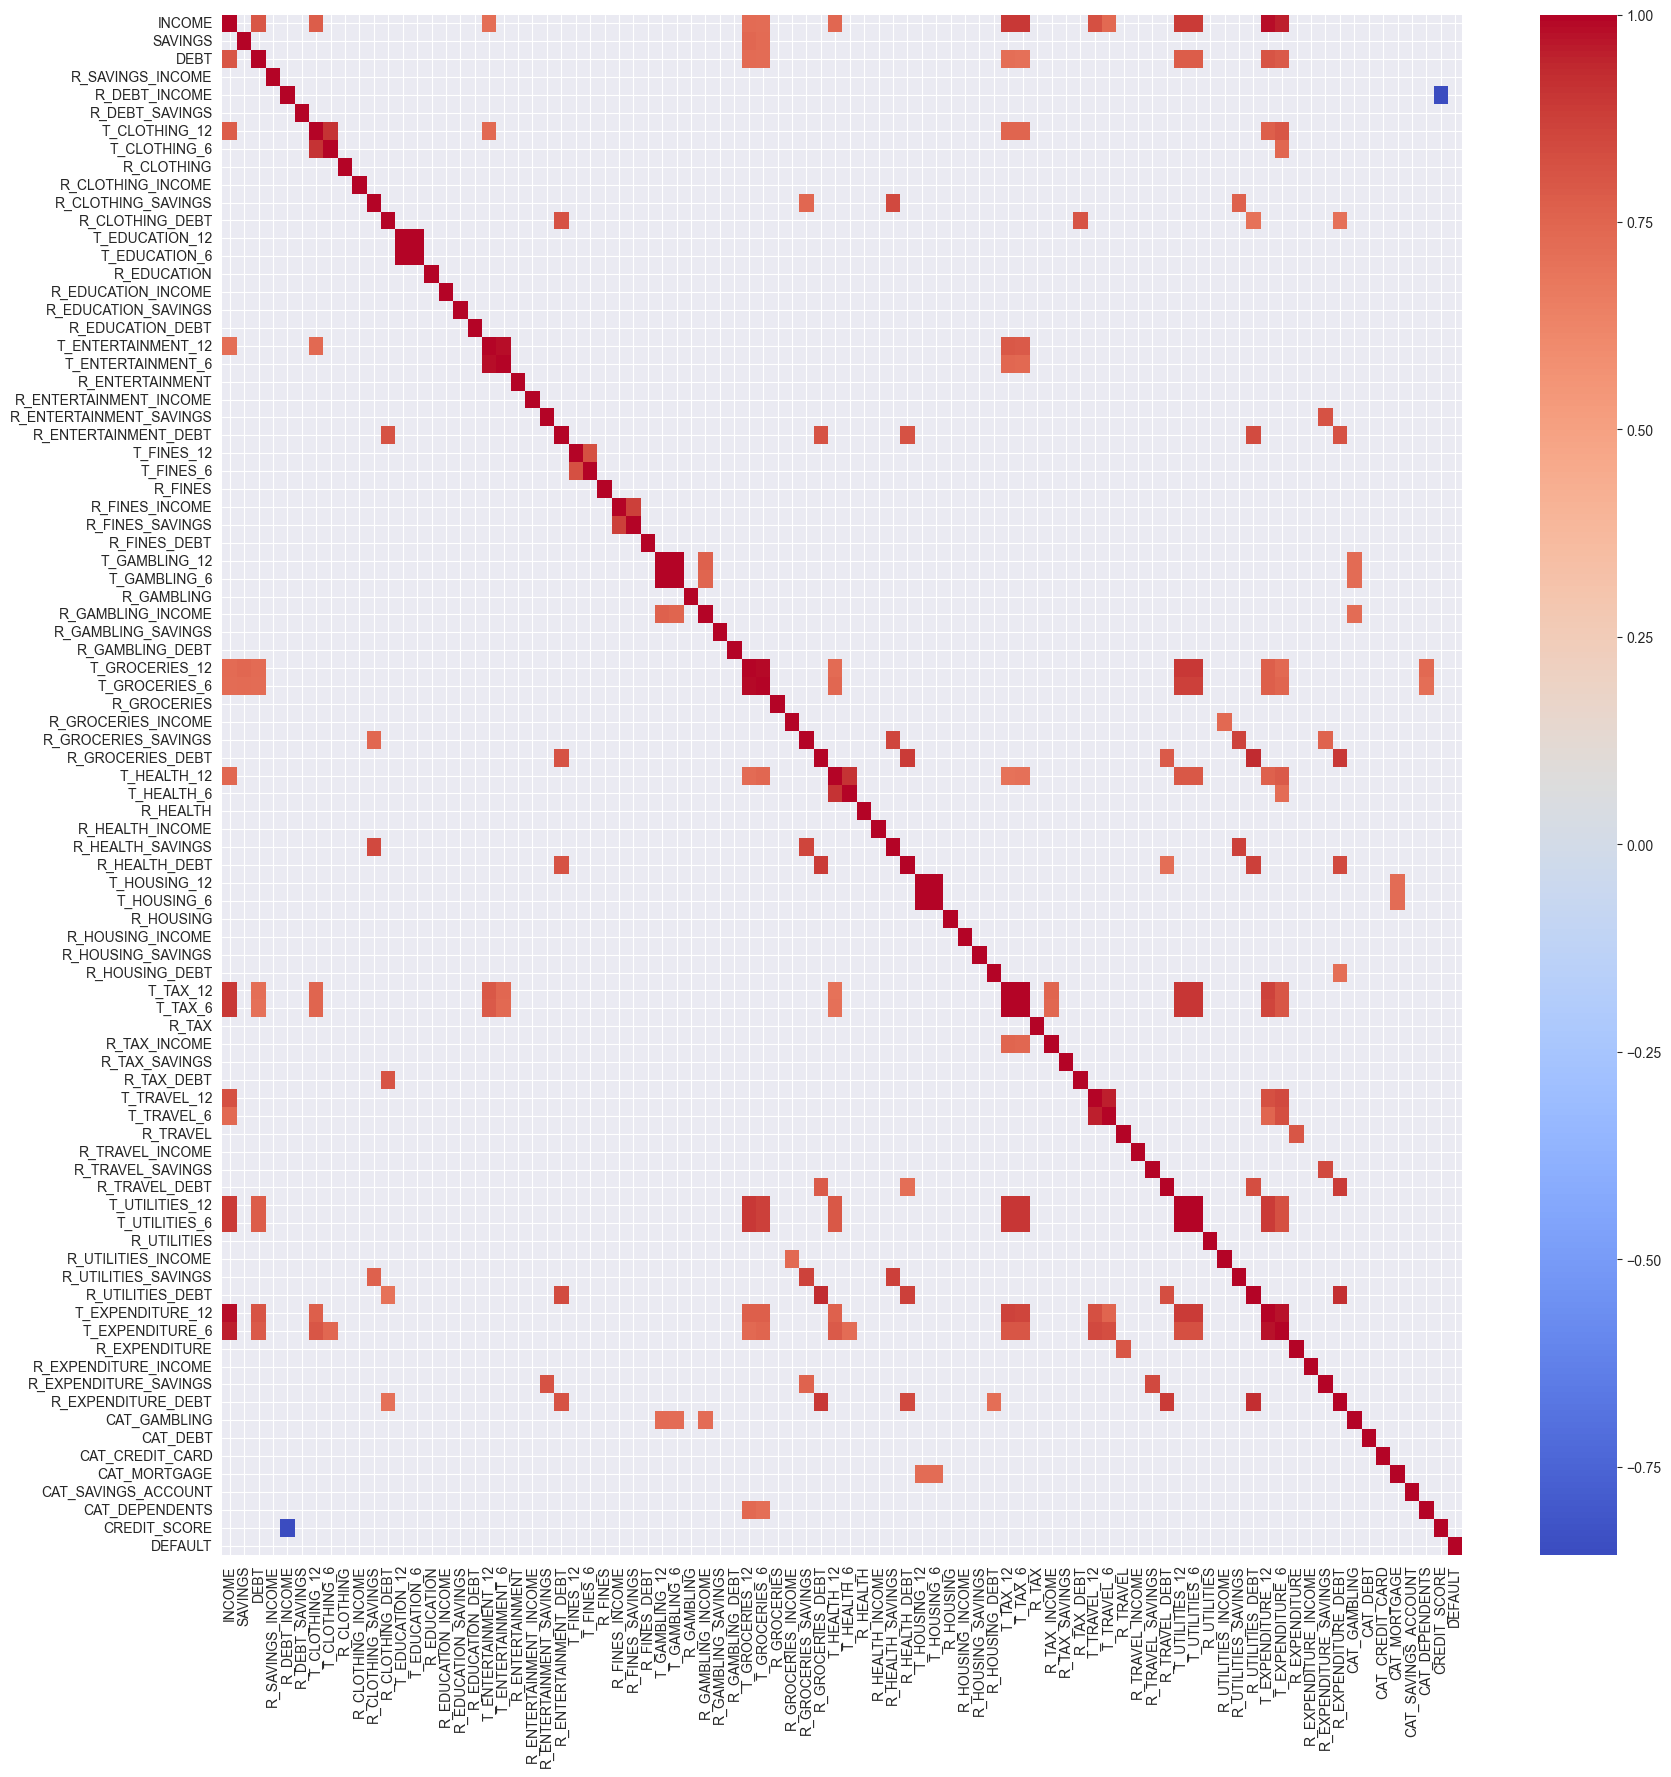

In [72]:
high_correlation_matrix= corr[abs(corr)>0.7]
#plot
plt.figure(figsize=(20, 20))
sns.heatmap(high_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

### BIG Canditates for removal - high correlation with other variables
- T_TAX_6
- T_TAX_12
- T_UTILITIES_6
- T_UTILITIES_12
- T_EXPENDITURE_6
- T_EXPENDITURE_12
- T_GROCERIES_6
- T_GROCERIES_12


### Small Canditates for removal - high correlation with other variables
- T_HEALTH_6
- T_HEALTH_12
- T_TRAVEL_6
- T_TRAVEL_12

### Summary
We have 3 similar columns
- T_{GROUP}_6
- T_{GROUP}_12
- R_{GROUP}

We might remove 2 of them but 100% sure that we will remove 1 of them

R_DEBT_INCOME and CREDIT_SCORE are highly correlated.

In [71]:
# show DEBT and CAT_DEBT column
df[['DEBT', 'CAT_DEBT']]

,DEBT,CAT_DEBT
0,0,0
1,707468,1
2,2782496,1
3,20818,1
4,2589215,1
...,...,...
485,457665,1
486,23162,1
487,160623,1
488,1863233,1


### DEBT and CAT_DEBT
- We will remove CAT_DEBT column, because this information is given in DEBT column

### BONUs -remove it

In [47]:
# create logitstic regression model for DEAFULT prediction
from sklearn.linear_model import LogisticRegression

# create model
lr = LogisticRegression(max_iter=1000)
X_train = df.drop(columns=[target])
y_train = df[target]
# fit model
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [48]:
# check model score
lr.score(X_train, y_train)

0.7244897959183674

In [49]:
df_val=pd.read_csv('../../data/for_modelling/credit_score_valid.csv')
# map CAT_GAMBLING
df_val['CAT_GAMBLING'] = df_val['CAT_GAMBLING'].map({'No': 0, 'Low': 1,'High': 2})
X_val=df_val.drop(columns=[target])
y_val=df_val[target]

In [50]:
y_hat=lr.predict(X_val)

In [51]:
#calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_hat)

0.7101449275362319